<a href="https://colab.research.google.com/github/mailech/SmartEnergy-Consumption/blob/Avany-Manoj/b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os

def generate_data():
    print("Generating synthetic energy data...")
    # Create date range for 6 months
    date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')

    # Create synthetic data
    df = pd.DataFrame(date_rng, columns=['timestamp'])

    # Simulate device power consumption (Watts)
    # Fridge: Cyclic pattern (on/off) + base load
    df['fridge'] = np.random.randint(50, 200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.3, 0.7])

    # AC: Higher in summer (April-June), lower in winter (Jan-March)
    month = df['timestamp'].dt.month
    ac_prob = np.where(month >= 4, 0.8, 0.1) # higher probability in summer months
    df['ac'] = np.random.randint(1000, 2500, size=(len(date_rng))) * np.random.binomial(1, ac_prob)

    # Lights: higher at night (18:00 - 06:00)
    hour = df['timestamp'].dt.hour
    light_prob = np.where((hour >= 18) | (hour <= 6), 0.9, 0.1)
    df['lights'] = np.random.randint(20, 100, size=(len(date_rng))) * np.random.binomial(1, light_prob)

    # Other appliances
    df['microwave'] = np.random.randint(800, 1200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.9, 0.1])

    # Total power
    df['total_power'] = df['fridge'] + df['ac'] + df['lights'] + df['microwave']

    data_path = os.path.join("energy_consumption_project", "data", "raw", "energy_data.csv")
    # Create parent directories if they don't exist
    os.makedirs(os.path.dirname(data_path), exist_ok=True)
    df.to_csv(data_path, index=False)
    print(f"Data saved to {data_path}")

if __name__ == "__main__":
    generate_data()


Generating synthetic energy data...
Data saved to energy_consumption_project/data/raw/energy_data.csv


/tmp/ipython-input-2216106194.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')


In [2]:
import pandas as pd


df = pd.read_csv("energy_consumption_project/data/raw/energy_data.csv")


df['timestamp'] = pd.to_datetime(df['timestamp'])


df.set_index('timestamp', inplace=True)


weekly_energy = df['total_power'].resample('W').sum() / 1000

print(weekly_energy)


timestamp
2023-01-01      9.263
2023-01-08     59.755
2023-01-15     67.450
2023-01-22     58.966
2023-01-29     60.773
2023-02-05     62.284
2023-02-12     58.061
2023-02-19     86.855
2023-02-26     68.130
2023-03-05     67.669
2023-03-12     62.002
2023-03-19     63.122
2023-03-26     63.546
2023-04-02    133.049
2023-04-09    270.493
2023-04-16    281.533
2023-04-23    256.638
2023-04-30    283.319
2023-05-07    270.136
2023-05-14    288.981
2023-05-21    272.559
2023-05-28    282.410
2023-06-04    291.379
2023-06-11    277.335
2023-06-18    298.262
2023-06-25    259.644
2023-07-02    156.496
Freq: W-SUN, Name: total_power, dtype: float64


In [3]:
weekly_appliance = df.resample('W').sum() / 1000
print(weekly_appliance)


            fridge       ac  lights  microwave  total_power
timestamp                                                  
2023-01-01   2.025    3.355   0.791      3.092        9.263
2023-01-08  14.168   24.827   5.024     15.736       59.755
2023-01-15  14.307   32.093   4.841     16.209       67.450
2023-01-22  15.314   22.555   5.028     16.069       58.966
2023-01-29  14.265   28.966   5.504     12.038       60.773
2023-02-05  14.208   28.758   5.463     13.855       62.284
2023-02-12  14.520   22.728   5.247     15.566       58.061
2023-02-19  15.029   46.108   5.660     20.058       86.855
2023-02-26  14.133   34.356   5.204     14.437       68.130
2023-03-05  14.360   25.035   5.438     22.836       67.669
2023-03-12  13.549   26.677   5.103     16.673       62.002
2023-03-19  14.945   32.421   5.394     10.362       63.122
2023-03-26  13.072   32.287   5.065     13.122       63.546
2023-04-02  15.081   95.137   5.459     17.372      133.049
2023-04-09  15.160  236.236   5.194     

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("energy_consumption_project/data/raw/energy_data.csv")


df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)


weekly = df.resample('W').sum() / 1000


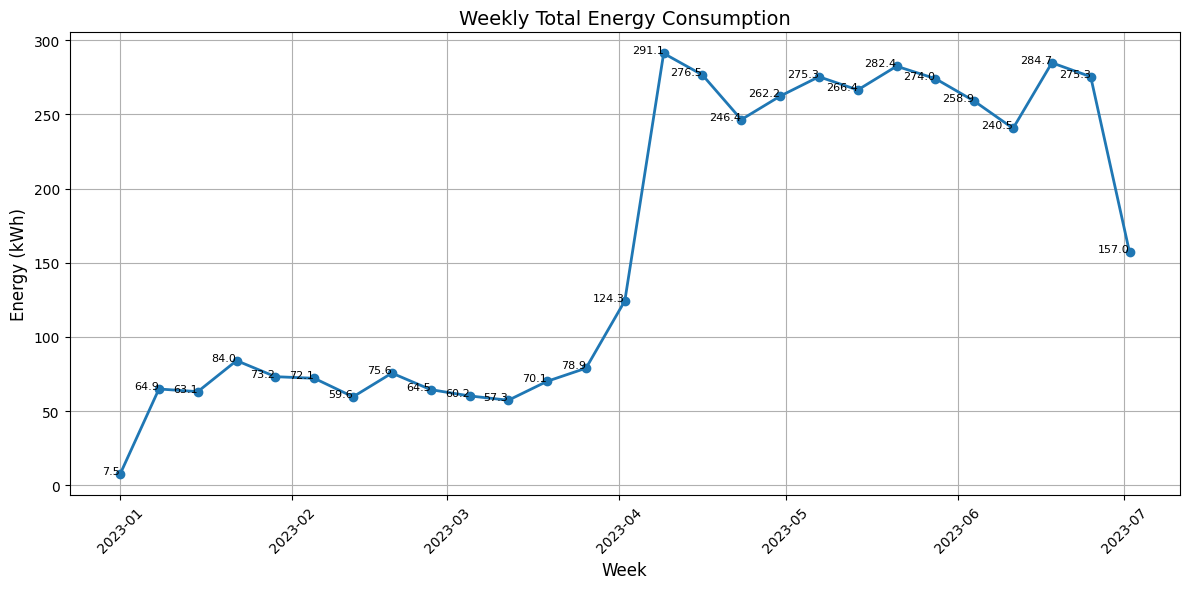

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(weekly.index, weekly['total_power'],
         marker='o', linestyle='-', linewidth=2)

plt.title("Weekly Total Energy Consumption", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Energy (kWh)", fontsize=12)

plt.grid(True)
plt.xticks(rotation=45)


for i, value in enumerate(weekly['total_power']):
    plt.text(weekly.index[i], value,
             f"{value:.1f}", fontsize=8,
             ha='right')

plt.tight_layout()
plt.show()


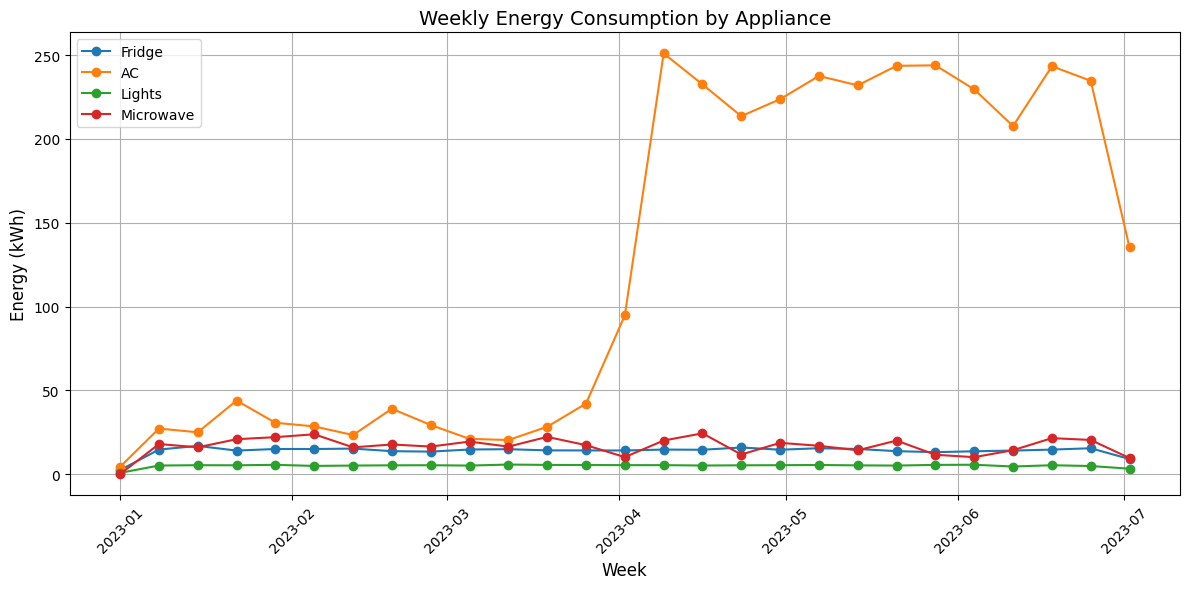

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(weekly.index, weekly['fridge'], marker='o', label='Fridge')
plt.plot(weekly.index, weekly['ac'], marker='o', label='AC')
plt.plot(weekly.index, weekly['lights'], marker='o', label='Lights')
plt.plot(weekly.index, weekly['microwave'], marker='o', label='Microwave')

plt.title("Weekly Energy Consumption by Appliance", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Energy (kWh)", fontsize=12)

plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
sns.set(style="whitegrid")


/tmp/ipython-input-2897721226.py:51: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


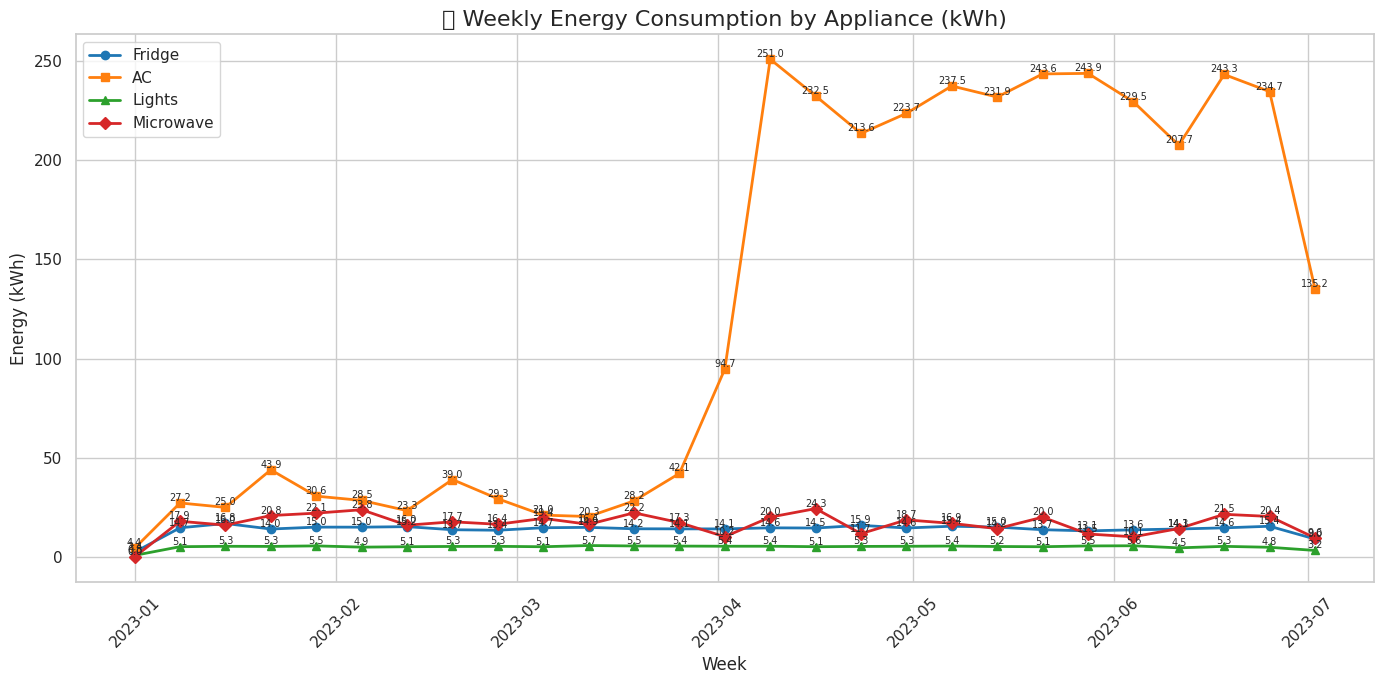

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("energy_consumption_project/data/raw/energy_data.csv")

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)


weekly = df.resample('W').sum() / 1000


sns.set(style="whitegrid")
plt.figure(figsize=(14,7))


appliances = {
    "Fridge": ("fridge", "o", "#1f77b4"),
    "AC": ("ac", "s", "#ff7f0e"),
    "Lights": ("lights", "^", "#2ca02c"),
    "Microwave": ("microwave", "D", "#d62728")
}

for label, (col, marker, color) in appliances.items():
    plt.plot(
        weekly.index,
        weekly[col],
        marker=marker,
        markersize=6,
        linewidth=2,
        label=label,
        color=color
    )


    for x, y in zip(weekly.index, weekly[col]):
        plt.text(x, y, f"{y:.1f}", fontsize=7,
                 ha='center', va='bottom')


plt.title("✨ Weekly Energy Consumption by Appliance (kWh)", fontsize=16)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Energy (kWh)", fontsize=12)

plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
available_cols = ['fridge', 'microwave']
df['total_kitchen_power'] = df[available_cols].sum(axis=1)
df['High_Usage'] = df['total_kitchen_power'] > 1.0
df[['total_kitchen_power', 'High_Usage']].sample(50)

,total_kitchen_power,High_Usage
timestamp,,
2023-05-09 01:00:00,1345,True
2023-01-23 19:00:00,102,True
2023-04-12 00:00:00,158,True
2023-04-29 19:00:00,0,False
2023-01-03 06:00:00,0,False
2023-06-17 17:00:00,153,True
2023-05-24 20:00:00,94,True
2023-01-26 11:00:00,170,True
2023-06-28 23:00:00,1035,True


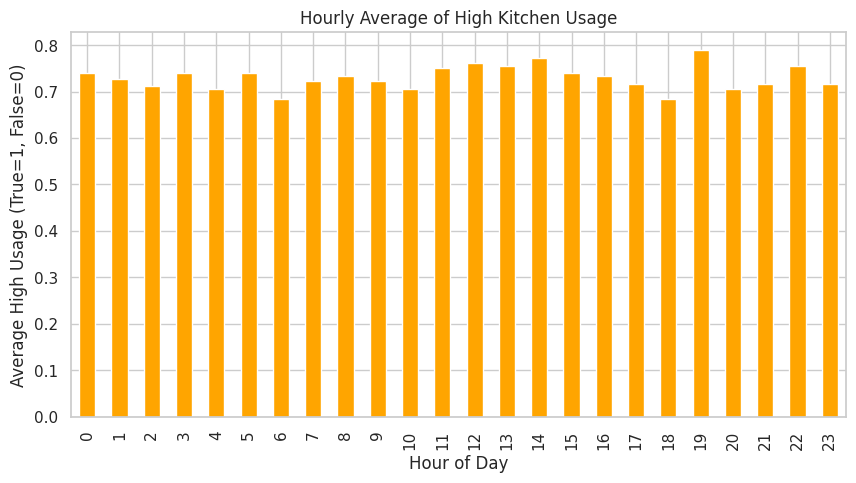

In [ ]:
df['hour']=df.index.hour
hourly_status=df.groupby('hour')['High_Usage'].mean()
plt.figure(figsize=(10,5))
hourly_status.plot(kind='bar',color='orange')
plt.title('Hourly Average of High Kitchen Usage')
plt.xlabel('Hour of Day')
plt.ylabel('Average High Usage (True=1, False=0)')
plt.show()